In [1]:
import numpy as np
import pyuvdata
import matplotlib.pyplot as plt

In [2]:
cal_vanilla = pyuvdata.UVCal()
cal_vanilla.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/excluded_sources_vanilla_cal.calfits')
cal_dw = pyuvdata.UVCal()
cal_dw.read_calfits('/Users/ruby/Astro/dwcal_tests_Jan2022/excluded_sources_wedge_excluded.calfits')

telescope_location is not set. Using known values for mwa.


In [3]:
np.shape(cal_vanilla.gain_array)

(127, 1, 384, 1, 1)

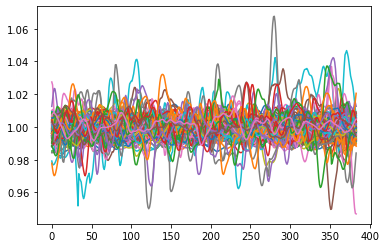

In [4]:
for ant_ind in range(127):
    plt.plot(np.abs(cal_vanilla.gain_array[ant_ind,0,:,0,0]))
plt.show()

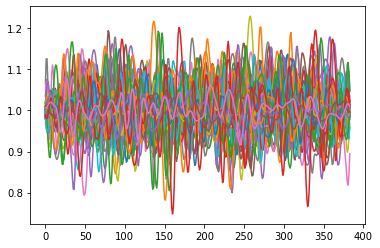

In [5]:
for ant_ind in range(127):
    plt.plot(np.abs(cal_dw.gain_array[ant_ind,0,:,0,0]))
plt.show()

In [6]:
Nfreqs = 384
delay_step = 0.1
Nbls = 1000
delay_array = np.arange(
    -(Nfreqs - 1) * delay_step, Nfreqs * delay_step, delay_step, dtype=float
)

In [7]:
print(delay_array)

[-3.83000000e+01 -3.82000000e+01 -3.81000000e+01 -3.80000000e+01
 -3.79000000e+01 -3.78000000e+01 -3.77000000e+01 -3.76000000e+01
 -3.75000000e+01 -3.74000000e+01 -3.73000000e+01 -3.72000000e+01
 -3.71000000e+01 -3.70000000e+01 -3.69000000e+01 -3.68000000e+01
 -3.67000000e+01 -3.66000000e+01 -3.65000000e+01 -3.64000000e+01
 -3.63000000e+01 -3.62000000e+01 -3.61000000e+01 -3.60000000e+01
 -3.59000000e+01 -3.58000000e+01 -3.57000000e+01 -3.56000000e+01
 -3.55000000e+01 -3.54000000e+01 -3.53000000e+01 -3.52000000e+01
 -3.51000000e+01 -3.50000000e+01 -3.49000000e+01 -3.48000000e+01
 -3.47000000e+01 -3.46000000e+01 -3.45000000e+01 -3.44000000e+01
 -3.43000000e+01 -3.42000000e+01 -3.41000000e+01 -3.40000000e+01
 -3.39000000e+01 -3.38000000e+01 -3.37000000e+01 -3.36000000e+01
 -3.35000000e+01 -3.34000000e+01 -3.33000000e+01 -3.32000000e+01
 -3.31000000e+01 -3.30000000e+01 -3.29000000e+01 -3.28000000e+01
 -3.27000000e+01 -3.26000000e+01 -3.25000000e+01 -3.24000000e+01
 -3.23000000e+01 -3.22000

In [8]:
delay_weighting = np.zeros((Nbls, 2 * Nfreqs - 1))

In [9]:
np.where(np.abs(delay_array)<1e-10)

(array([383]),)

In [10]:
delay_weighting[:,383] = 1

In [11]:
# Shift delay zero point to the start
delay_weighting = np.fft.ifftshift(delay_weighting, axes=1)
# Fourier transform
freq_weighting = np.fft.fft(delay_weighting, axis=1)
# Result is symmetric and real, so keep half the values and real part only
freq_weighting = np.real(freq_weighting[:, 0:Nfreqs])

In [12]:
np.shape(freq_weighting)

(1000, 384)

In [13]:
print(freq_weighting[0,:])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [14]:
print(np.min(freq_weighting))
print(np.max(freq_weighting))

1.0
1.0


In [27]:
model_path="/Users/ruby/Astro/dwcal_tests_Jan2022/fhd_rlb_model_GLEAM_bright_sources_Dec2021"
obsid="1061316296"
pol="XX"
model_filelist = [
    "{}/{}".format(model_path, file)
    for file in [
        "vis_data/{}_vis_{}.sav".format(obsid, pol),
        "vis_data/{}_vis_model_{}.sav".format(obsid, pol),
        "vis_data/{}_flags.sav".format(obsid),
        "metadata/{}_params.sav".format(obsid),
        "metadata/{}_settings.txt".format(obsid),
        "metadata/{}_layout.sav".format(obsid),
    ]
]
model = pyuvdata.UVData()
model.read_fhd(model_filelist, use_model=True)
print(np.max(model.flag_array))
# Average across time
model.downsample_in_time(n_times_to_avg=model.Ntimes)
# Remove autocorrelations
bl_lengths = np.sqrt(np.sum(model.uvw_array ** 2.0, axis=1))
non_autos = np.where(bl_lengths > 0.01)[0]
model.select(blt_inds=non_autos)

Telescope location derived from obs lat/lon/alt values does not match the location in the layout file. Using the value from known_telescopes.


True


There is a gap in the times of baseline (0, 0). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 1). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 2). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 3). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 4). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 5). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 6). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 7). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 8). The output may include averages across long time gaps.
There is a gap in the times of baseline (0, 9). The output may include av

There is a gap in the times of baseline (2, 86). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 87). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 88). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 89). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 90). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 91). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 94). The output may include averages across long time gaps.
There is a gap in the times of baseline (2, 95). The output may 

There is a gap in the times of baseline (4, 109). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 110). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 111). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 112). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (4, 118). The o

There is a gap in the times of baseline (7, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 104). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 105). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 106). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 107). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 108). The output may include averages across long time gaps.
There is a gap in the times of baseline (7, 109). The o

There is a gap in the times of baseline (10, 110). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 111). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 112). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (10, 1

There is a gap in the times of baseline (13, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (13, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (14, 14). The output may include averages across long time gaps.
There is a gap in the times of baseline (14, 15

There is a gap in the times of baseline (16, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 94). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 95). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 96). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 97). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (16, 101). The

There is a gap in the times of baseline (19, 91). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 92). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 93). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 94). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 95). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 96). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 97). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (19, 100). The 

There is a gap in the times of baseline (22, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (22, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (22, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (22, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (23, 23). The output may include averages across long time gaps.
There is a gap in the times of baseline (23, 24). The output may include averages across long time gaps.
There is a gap in the times of baseline (23, 25). The output may include averages across long time gaps.
There is a gap in the times of baseline (23, 26). The output may include averages across long time gaps.
There is a gap in the times of baseline (23, 27). The output may include averages across long time gaps.
There is a gap in the times of baseline (23, 28). T

There is a gap in the times of baseline (26, 29). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 30). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 31). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 32). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 33). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 34). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 35). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 36). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 37). The output may include averages across long time gaps.
There is a gap in the times of baseline (26, 38). The o

There is a gap in the times of baseline (29, 41). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 42). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 43). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 44). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 45). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 46). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 47). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 48). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 49). The output may include averages across long time gaps.
There is a gap in the times of baseline (29, 50). The o

There is a gap in the times of baseline (32, 71). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (32, 81). The o

There is a gap in the times of baseline (35, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (35, 1

There is a gap in the times of baseline (39, 59). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 60). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 67). The output may include averages across long time gaps.
There is a gap in the times of baseline (39, 68). The o

There is a gap in the times of baseline (43, 58). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 59). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 60). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (43, 67). The o

There is a gap in the times of baseline (47, 97). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 98). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 99). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 104). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 105). The output may include averages across long time gaps.
There is a gap in the times of baseline (47, 106)

There is a gap in the times of baseline (52, 61). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 62). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 63). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 64). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 65). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 67). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 68). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (52, 70). The o

There is a gap in the times of baseline (56, 71). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 72). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (56, 81). The o

There is a gap in the times of baseline (60, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (60, 1

There is a gap in the times of baseline (65, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (65, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (65, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (65, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (65, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (66, 66). The output may include averages across long time gaps.
There is a gap in the times of baseline (66, 67). The output may include averages across long time gaps.
There is a gap in the times of baseline (66, 68). The output may include averages across long time gaps.
There is a gap in the times of baseline (66, 69). The output may include averages across long time gaps.
There is a gap in the times of baseline (66, 70). 

There is a gap in the times of baseline (71, 73). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 74). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 75). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 77). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 78). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 79). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 80). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 81). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 82). The output may include averages across long time gaps.
There is a gap in the times of baseline (71, 83). The o

There is a gap in the times of baseline (77, 113). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 114). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 115). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 116). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (77, 1

There is a gap in the times of baseline (81, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (81, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 82). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 83). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 84). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 85). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 86). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 87). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 88). The output may include averages across long time gaps.
There is a gap in the times of baseline (82, 89). The

There is a gap in the times of baseline (89, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 102). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 103). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 104). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 105). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 106). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 107). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 108). The output may include averages across long time gaps.
There is a gap in the times of baseline (89, 1

There is a gap in the times of baseline (99, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (99, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (99, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (99, 124). The output may include averages across long time gaps.
There is a gap in the times of baseline (99, 125). The output may include averages across long time gaps.
There is a gap in the times of baseline (99, 126). The output may include averages across long time gaps.
There is a gap in the times of baseline (99, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (100, 100). The output may include averages across long time gaps.
There is a gap in the times of baseline (100, 101). The output may include averages across long time gaps.
There is a gap in the times of baseline (100

There is a gap in the times of baseline (116, 127). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 117). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 118). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 119). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 120). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 121). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 122). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 123). The output may include averages across long time gaps.
There is a gap in the times of baseline (117, 124). The output may include averages across long time gaps.
There is a gap in the times of baseli

In [46]:
print(np.shape(model.flag_array))
print(np.shape(model.data_array))
flagged_bls = np.max(model.flag_array, axis=0)
flagged_freqs = np.squeeze(np.max(model.flag_array, axis=2))
np.shape(flagged_freqs)
print(np.shape(np.where(flagged_freqs)))

(8001, 1, 384, 1)
(8001, 1, 384, 1)
(1, 2374)


In [16]:
model.antenna_numbers

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127], dtype=int32)

In [17]:
model.select(antenna_nums=[3, 4, 57, 70, 92, 110])

In [18]:
np.shape(model.data_array)

(15, 1, 384, 1)

In [19]:
bl_lengths = np.sqrt(np.sum(model.uvw_array ** 2.0, axis=1))

In [20]:
print(bl_lengths)

[ 12.94269909 104.45735702 306.15347806 574.18998275 641.31037914
 110.01301273 318.69110761 585.90524566 644.88466613 257.32715778
 501.90557872 726.73620223 279.32537684 706.73943836 931.79484561]


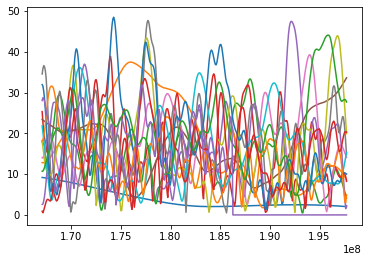

In [23]:
for bl_ind in range(model.Nbls):
    plt.plot(model.freq_array[0,:], np.abs(model.data_array[bl_ind, 0, :, 0]))

In [25]:
np.max(model.flag_array)

True

In [54]:
test = np.max(np.stack([
    np.squeeze(model.flag_array, axis=(1, 3)),
    np.squeeze(model.flag_array, axis=(1, 3))
]), axis=0)

In [55]:
np.shape(test)

(8001, 384)

In [56]:
flagged_channels=np.where(test)

In [57]:
np.shape(flagged_channels)

(2, 815207)

In [58]:
True*5.

5.0

In [59]:
False*5.

0.0

In [61]:
np.sum([True, True])

2

In [62]:
np.prod(np.shape(flagged_channels))

1630414